In [ ]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# Epipolar Geometry

In class we covered material for single and multi-camera systems. This notebook will help ground some of these geometric concepts.

## Camera Projection

First, we'll define some helper functions.

In [ ]:
def rot_x(t) :
    """Creates a 3D rotation matrix representing a rotation
    about the x-axis by t radians."""
    return np.array([
        [1,         0,          0],
        [0, np.cos(t), -np.sin(t)],
        [0, np.sin(t),  np.cos(t)]
    ])

def rot_y(t) :
    """Creates a 3D rotation matrix representing a rotation
    about the y-axis by t radians."""
    return np.array([
        [ np.cos(t), 0, np.sin(t)],
        [         0, 1,         0],
        [-np.sin(t), 0, np.cos(t)]
    ])

def rot_z(t) :
    """Creates a 3D rotation matrix representing a rotation
    about the z-axis by t radians."""
    return np.array([
        [np.cos(t), -np.sin(t), 0],
        [np.sin(t),  np.cos(t), 0],
        [        0,          0, 1]
    ])

def translation(x, y, z) :
    """Creates a 3D translation vector of shape 3x1."""
    return np.array([[x,y,z]]).T

def transformation(R, t) :
    """Creates a 3D homogeneous transformation matrix
    given a rotation matrix and a translation vector."""
    return np.concatenate([
        np.concatenate((R, t), axis=1),
        np.array([[0, 0, 0, 1]])
    ])

def intrinsic_matrix(fx, fy, ox, oy) :
    """Creates the 3x4 intrinsic matrix given camera parameters."""
    return np.array([
        [fx,  0, ox, 0],
        [ 0, fy, oy, 0],
        [ 0,  0,  1, 0],
    ])

def T_matrix(tx, ty, tz) :
    return np.array([ 
        [0, -tz, ty],
        [tz, 0, -tx],
        [-ty, tx, 0],
    ])

Let's first define some points in 3D and visualize them.

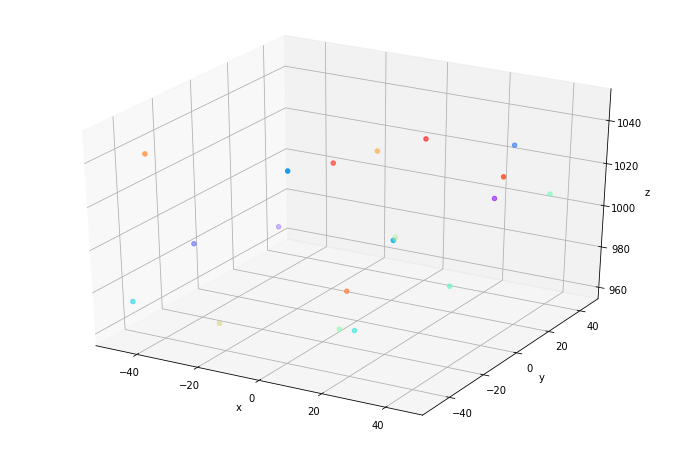

In [ ]:
pts = np.array([
    [  26.121,  32.847, 1005.353, 1.],
    [ -44.027,  30.439,  973.450, 1.],
    [ -46.379, -13.096,  985.124, 1.],
    [  30.911,  34.686, 1030.866, 1.],
    [   4.990, -46.464, 1048.179, 1.],
    [  27.133, -28.476, 1014.759, 1.],
    [ -47.045, -45.281,  972.736, 1.],
    [  14.218, -26.843,  967.712, 1.],
    [  28.478,   2.358,  978.545, 1.],
    [  41.695,  36.650, 1009.917, 1.],
    [   7.024, -22.803,  964.057, 1.],
    [ -12.522,  45.107,  970.331, 1.],
    [  -7.957,  36.629,  974.575, 1.],
    [ -27.472, -30.949,  960.675, 1.],
    [  16.020, -17.619, 1047.176, 1.],
    [ -38.449, -48.483, 1045.377, 1.],
    [   8.596, -21.297,  982.135, 1.],
    [  44.768,   1.136, 1034.768, 1.],
    [ -13.129,   9.305, 1022.283, 1.],
    [   3.906,  32.476, 1027.867, 1.],
]).T
xs, ys, zs, _ = np.split(pts, 4, axis=0)

# Plot these points.
colors = plt.cm.rainbow(np.linspace(0, 1, pts.shape[1]))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs=zs, s=20, c=colors)
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()

(3 points) With the helper functions, do the following:
- Create an intrinsic matrix $M$ with parameters $f_x=f_y=1000$, $o_x=52.2$, $o_y=55.3$.
- Create an extrinsic matrix $H$ with no rotation and a translation $(x, y, z) = (42, 33, 1000)$.
- Using $M$ and $H$, create a projection matrix $P$. Print $P$.

In [ ]:
# x_rot = rot_x(0)
# y_rot = rot_y(0)
# z_rot = rot_z(0)
# z_rot

In [ ]:
# t = translation(42, 33, 1000)
# R = z_rot @ y_rot @ x_rot

In [ ]:
M = intrinsic_matrix(1000, 1000, 52.2, 55.3)

t = translation(42, 33, 1000)
x_rot = rot_x(0)
y_rot = rot_y(0)
z_rot = rot_z(0)
R = z_rot @ y_rot @ x_rot

H = transformation(R, t)
P = M @ H
np.set_printoptions(precision=5, suppress=True)
print(P)

[[ 1000.      0.     52.2 94200. ]
 [    0.   1000.     55.3 88300. ]
 [    0.      0.      1.   1000. ]]


(1 points) In the cell below, project the 3D points `pts` to 2D using this projection matrix and store the resulting pixel coordinates into `pxs`. Remember that the results are in homogeneous coordinates, so you will need to normalize each pixel such that $w=1$ for homogeneous coordinate $(u, v, w)$.

In [ ]:
print(P.shape)
print(pts.shape)

(3, 4)
(4, 20)


In [ ]:
pxs = P @ pts
pxs.shape

(3, 20)

In [ ]:
pxs

array([[172800.4266, 100987.09  ,  99244.4728, 178922.2052, 153904.9438,
        174303.4198,  97931.8192, 158932.5664, 173758.049 , 188612.6674,
        151547.7754, 132329.2782, 137115.815 , 116875.235 , 164882.5872,
        110319.6794, 154063.447 , 192982.8896, 134434.1726, 151760.6574],
       [176743.0209, 172570.785 , 129681.3572, 179992.8898,  99800.2987,
        115940.1727,  96811.3008, 114971.4736, 144771.5385, 180798.4101,
        118809.3521, 187066.3043, 178822.9975, 110476.3275, 128589.8328,
         97626.3481, 121315.0655, 146658.6704, 154137.2499, 177617.0451],
       [  2005.353 ,   1973.45  ,   1985.124 ,   2030.866 ,   2048.179 ,
          2014.759 ,   1972.736 ,   1967.712 ,   1978.545 ,   2009.917 ,
          1964.057 ,   1970.331 ,   1974.575 ,   1960.675 ,   2047.176 ,
          2045.377 ,   1982.135 ,   2034.768 ,   2022.283 ,   2027.867 ]])

In [ ]:
pxs_ = pxs/pxs[2, :]
pxs_

array([[86.16958, 51.17286, 49.99409, 88.10143, 75.14233, 86.51329,
        49.64264, 80.77024, 87.82113, 93.84102, 77.16058, 67.16094,
        69.44067, 59.60969, 80.54148, 53.93611, 77.72601, 94.8427 ,
        66.47644, 74.83758],
       [88.13562, 87.44624, 65.32658, 88.62864, 48.72636, 57.54543,
        49.07464, 58.42901, 73.17071, 89.95317, 60.4918 , 94.94156,
        90.56278, 56.34607, 62.81328, 47.73025, 61.20424, 72.07636,
        76.21943, 87.58811],
       [ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
         1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
         1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
         1.     ,  1.     ]])

In [ ]:
pxs[0, :]

array([172800.4266, 100987.09  ,  99244.4728, 178922.2052, 153904.9438,
       174303.4198,  97931.8192, 158932.5664, 173758.049 , 188612.6674,
       151547.7754, 132329.2782, 137115.815 , 116875.235 , 164882.5872,
       110319.6794, 154063.447 , 192982.8896, 134434.1726, 151760.6574])

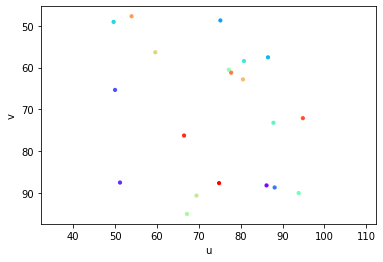

In [ ]:
pxs = P @ pts

# row_sums = pxs.sum(axis=1)
# pxs_norm = pxs / row_sums[:, np.newaxis]
# pxs_norm[2, :] = 1

pxs_norm = pxs/pxs[2, :]

# Plot these points
fig = plt.figure()
plt.scatter(pxs_norm[0], pxs_norm[1], s=10, c=colors)
plt.gca().invert_yaxis()
plt.xlabel('u'); plt.ylabel('v')
plt.axis('equal')
plt.show()

In [ ]:
pxs_norm

array([[0.05866, 0.03428, 0.03369, 0.06074, 0.05225, 0.05917, 0.03325,
        0.05395, 0.05899, 0.06403, 0.05145, 0.04492, 0.04655, 0.03968,
        0.05597, 0.03745, 0.0523 , 0.06551, 0.04564, 0.05152],
       [0.06238, 0.06091, 0.04577, 0.06353, 0.03523, 0.04092, 0.03417,
        0.04058, 0.0511 , 0.06381, 0.04193, 0.06603, 0.06312, 0.03899,
        0.04539, 0.03446, 0.04282, 0.05176, 0.0544 , 0.06269],
       [1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
        1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
        1.     , 1.     , 1.     , 1.     , 1.     , 1.     ]])

(1 point) Why did we invert the y axis here?

In [ ]:
# Type your answer below.
# 

Let's now compare the 2D projections with the 3D points viewd from the corresponding viewpoint.

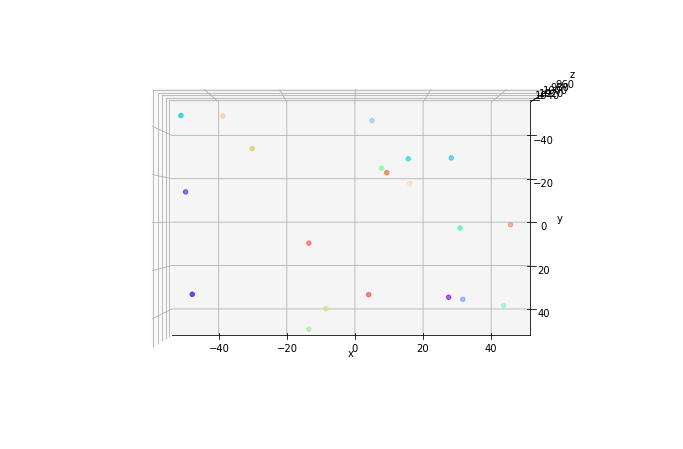

In [ ]:
# Plot pts again but with a different viewpoint.
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs=zs, s=20, c=colors)
ax.view_init(elev=-90, azim=-90)
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()

## Epipolar Geometry

Now that we're more confident with single camera geometry, let's try to relate the geometries and the viewpoints of two cameras.

(1 point) For camera 1, create an intrinsic matrix with parameters $f_x=f_y=1000$, $o_x=35$, $o_y=55.3$, an extrinsic matrix with a y-axis rotation by -0.3 radians, and a translation vector of $(280, 33, 1000)$. Calculate the resulting projection matrix.

Project the same 3D points in the previous section into the view of this camera, and plot these pixel coordinates with the same colors by setting `c=colors`. Remember to invert the y-axis.

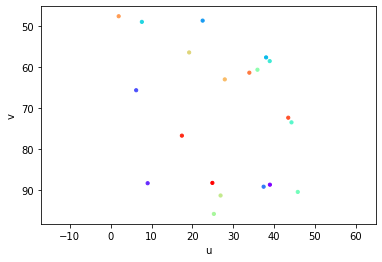

In [ ]:
M1 = intrinsic_matrix(1000, 1000, 35, 55.3)

t1 = translation(280, 33, 1000)
x1_rot = rot_x(0)
y1_rot = rot_y(-0.3)
z1_rot = rot_z(0)
R1 = z1_rot @ y1_rot @ x1_rot

H1 = transformation(R1, t1)
P1 = M1 @ H1

pxs1 = P1 @ pts
img_norm1 = pxs1/pxs1[2, :]

# Plot these points
fig = plt.figure()
plt.scatter(img_norm1[0], img_norm1[1], s=10, c=colors)
plt.gca().invert_yaxis()
plt.xlabel('u'); plt.ylabel('v')
plt.axis('equal')
plt.show()

(1 point) Now do the same for 2 with intrinsic parameters $s_x=s_y=1000$, $o_x=35$, $o_y=55.3$, whereas the extrinsic matrix is defined by a y-axis rotation by 0.3 radians, and a translation vector of $[390, 33, 1000]$.

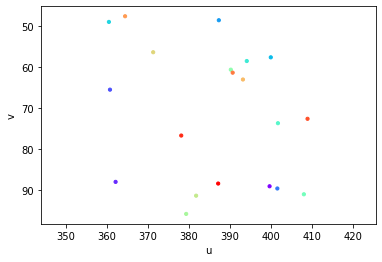

In [ ]:
M2 = intrinsic_matrix(1000, 1000, 35, 55.3)

t2 = translation(390, 33, 1000)
x2_rot = rot_x(0)
y2_rot = rot_y(0.3)
z2_rot = rot_z(0)
R2 = z2_rot @ y2_rot @ x2_rot

H2 = transformation(R2, t2)
P2 = M2 @ H2

pxs2 = P2 @ pts
img_norm2 = pxs2/pxs2[2, :]

# Plot these points
fig = plt.figure()
plt.scatter(img_norm2[0], img_norm2[1], s=10, c=colors)
plt.gca().invert_yaxis()
plt.xlabel('u'); plt.ylabel('v')
plt.axis('equal')
plt.show()

Now we have the pixel coordinates in both images and their correspondence, we can solve for the fundamental matrix, which relates pixel coordinates from one image to another.

(2 points) Below, fill in the matrix $A$ following the slides.

In [ ]:
print(M1.shape)
print(M2.shape)
print(pxs1.shape)
print(pxs2.shape)

(3, 4)
(3, 4)
(3, 20)
(3, 20)


In [ ]:
img_norm1

array([[0.07169, 0.01622, 0.01124, 0.06976, 0.04214, 0.0703 , 0.01367,
        0.07016, 0.08038, 0.08462, 0.06457, 0.0454 , 0.04848, 0.03428,
        0.05233, 0.00364, 0.06156, 0.08131, 0.03213, 0.04613],
       [0.06275, 0.06086, 0.04543, 0.06392, 0.03495, 0.0409 , 0.03363,
        0.04052, 0.0513 , 0.06429, 0.04186, 0.06626, 0.06332, 0.03867,
        0.04535, 0.03391, 0.04275, 0.05202, 0.05438, 0.06291],
       [1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
        1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
        1.     , 1.     , 1.     , 1.     , 1.     , 1.     ]])

In [ ]:
img_norm1[0]

array([38.9896 ,  9.05543,  6.2405 , 37.45174, 22.52223, 38.05411,
        7.63898, 38.94284, 44.27632, 45.81459, 35.94222, 25.26922,
       26.90737, 19.21497, 27.93956,  1.95972, 33.95473, 43.47927,
       17.4367 , 24.90278])

In [ ]:
img_norm1.shape

(3, 20)

In [ ]:
# A = []
# for i in range(8):
#   a = np.hstack((image_plane_norm1[0][i]*image_plane_norm2[0][i], image_plane_norm1[0][i]*image_plane_norm2[i][0], 
#                  image_plane_norm1[0][i], image_plane_norm1[i][0]*image_plane_norm2[0][i], image_plane_norm1[i][0]*image_plane_norm2[i][0], 
#                  image_plane_norm1[i][0], image_plane_norm2[0][i], image_plane_norm2[i][0], 1))
#   A.append(a)

# A = np.stack(A, axis=0)
# print(A)
# print(A.shape)


A = []
# u is for y coord iteration, v for x coord iteration
u = 1
v = 0
for i in range(8):
  a = np.hstack((img_norm1[u][i]*img_norm2[u][i], img_norm1[u][i]*img_norm2[v][i], 
                 img_norm1[u][i], img_norm1[v][i]*img_norm2[u][i], 
                 img_norm1[v][i]*img_norm2[v][i], img_norm1[v][i], 
                 img_norm2[u][i], img_norm2[v][i], 1))
  A.append(a)

A = np.stack(A, axis=0)
print(A)

[[ 7901.09648 35471.003      88.75596  3470.87267 15582.0569     38.9896
     89.02046   399.64645     1.     ]
 [ 7774.23728 32010.19348    88.39352   796.42765  3279.26745     9.05543
     87.95031   362.13281     1.     ]
 [ 4297.36879 23675.87393    65.62676   408.64037  2251.35855     6.2405
     65.48196   360.76553     1.     ]
 [ 7992.78026 35835.79137    89.24554  3354.15703 15038.43067    37.45174
     89.55944   401.54155     1.     ]
 [ 2359.29582 18813.21436    48.57754  1093.85149  8722.45966    22.52223
     48.56763   387.28215     1.     ]
 [ 3317.43069 23031.7506     57.58779  2192.16364 15219.41856    38.05411
     57.60649   399.94156     1.     ]
 [ 2394.5456  17624.46387    48.88824   374.1573   2753.89275     7.63898
     48.97999   360.50516     1.     ]
 [ 3422.16845 23051.38677    58.49232  2278.40099 15347.08277    38.94284
     58.50629   394.09255     1.     ]]


(2 points) Solve for the fundamental matrix given that $Af=0$, and print out the fundamental matrix $F$. You should already know how to solve this after solving a similar problem in the notebook for module 6.

In [ ]:
tmp = np.matmul(A.transpose(), A)
eigval, eigvec = np.linalg.eigh(tmp)
F = eigvec[:, 0]
print(F.shape)
print(F)
F = F.reshape(3, 3)
np.set_printoptions(precision=5, suppress=True)

(9,)
[ 0.       0.00005  0.05584 -0.00001 -0.       0.00036 -0.07384 -0.00261
  0.9957 ]


(1 point) Given the two camera calibration matrices and the fundamental matrix $F$, calculate the essential matrix $E$ and print the result.

In [ ]:
M1.shape

(3, 3)

In [ ]:
M1 = M1[0:3, 0:3]
M2 = M2[0:3, 0:3]

print(M1.shape)
print(M2.shape)

(3, 3)
(3, 3)


In [ ]:
E = M1 @ F @ M2

Using the essential matrix $E$ we could recover $R$ and $t$ between the cameras using SVD. However, there are some nuances about the sign of results in this process and we could get 4 possible solutions for $R$. (For more details, check section 11.3 of the 2nd edition of [Richard Szeliski's book](https://szeliski.org/Book/).) For simplicity, in the cell below we will only show that one of the solutions matches the actual rotation we used to construct our camera projection matrices.

In [ ]:
# Print the actual rotation matrix we used.
R = rot_y(-0.6)
print(R)

[[ 0.82534  0.      -0.56464]
 [ 0.       1.       0.     ]
 [ 0.56464  0.       0.82534]]


In [ ]:
# Recover R from E.
u, s, vh = np.linalg.svd(E)

R1 =  u @ rot_z(np.pi/2) @ vh
print(np.allclose(R, R1))

R2 = -u @ rot_z(np.pi/2) @ vh
print(np.allclose(R, R2))

R3 =  u @ rot_z(-np.pi/2) @ vh
print(np.allclose(R, R3))

R4 = -u @ rot_z(-np.pi/2) @ vh
print(np.allclose(R, R4))

False
False
False
False
